# Importer les librairies nécessaires

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('new_Base_CDM_balanced_V2.csv' , delimiter=';')
data.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,Display,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
1,No_Displ,2,20.2,47400,36,CORA,72,No_Feat
2,No_Displ,2,11.9,62000,24,LECLERC,48,No_Feat
3,No_Displ,8,29.52,60661,60,AUCHAN,480,No_Feat
4,No_Displ,2,16.2,59677,19,CARREFOUR,38,No_Feat


In [3]:
# Supprimer la premiere ligne du dataframe
data = data.drop(0)

# Réinitialiser les index après la suppression
data = data.reset_index(drop=True)

# Transforming Categorical features

In [4]:
# Définir la correspondance entre les classes et les valeurs numériques
mapping = {'No_Displ': 1, 'Displ': 0}
mapping1 = {'No_Feat': 1, 'Feat': 0}

# Appliquer la conversion 
data['Y'] = data['Y'].map(mapping)
data['X7'] = data['X7'].map(mapping1)

In [5]:
# Appliquer le One-Hot Encoding à la variable X5
data = pd.get_dummies(data, columns=['X5'], drop_first=True)

In [6]:
X = data.drop('Y' , axis=1)
y = data['Y'].values
X[:5]

,X1,X2,X3,X4,X6,X7,X5_CARREFOUR,X5_CARREFOUR MARKET,X5_CASINO,X5_CORA,...,X5_INTERMARCHE,X5_LECLERC,X5_MARCHE U,X5_MATCH,X5_MONOPRIX,X5_OTHERS,X5_PRISUNIC,X5_SHOPI,X5_SIMPLY MARKET,X5_SUPER U
0,2,20.2,47400,36,72,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,11.9,62000,24,48,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,8,29.52,60661,60,480,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,16.2,59677,19,38,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,62.1,142602,50,250,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# La discrétisation des données

In [13]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer


# Create an instance of KBinsDiscretizer
kbin_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

# Apply discretization on the features
features_discretized = kbin_discretizer.fit_transform(X)

# Convert the discretized features back to a DataFrame
columns = X.columns
features_discretized_df = pd.DataFrame(features_discretized, columns=columns)
features_discretized_df.head()

,X1,X2,X3,X4,X6,X7,X5_CARREFOUR,X5_CARREFOUR MARKET,X5_CASINO,X5_CORA,...,X5_INTERMARCHE,X5_LECLERC,X5_MARCHE U,X5_MATCH,X5_MONOPRIX,X5_OTHERS,X5_PRISUNIC,X5_SHOPI,X5_SIMPLY MARKET,X5_SUPER U
0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,2.0,1.0,0.0,4.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split our Data into training and testing

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(features_discretized_df,y,test_size=0.2 , random_state=4)
x_train.shape,x_test.shape,len(y_train),len(y_test)

((20625, 24), (5157, 24), 20625, 5157)

# Modèles Implémentés

- **Régression logistique**

- **k-nearest neighbors**

- **Arbre de décision**


- **Adaboost (adaptive boosting)**

- **Random Forest**

- **Neural Network**


In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

## Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier


# Définir le modèle
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred_dt = DT.predict(x_test)

# Calculer l'accuracy sur les données de test
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Précision sur les données de test avec discrétisation :", accuracy_dt)

Précision sur les données de test: 0.7585805700988947


## {'No_Displ': 1, 'Displ': 0}

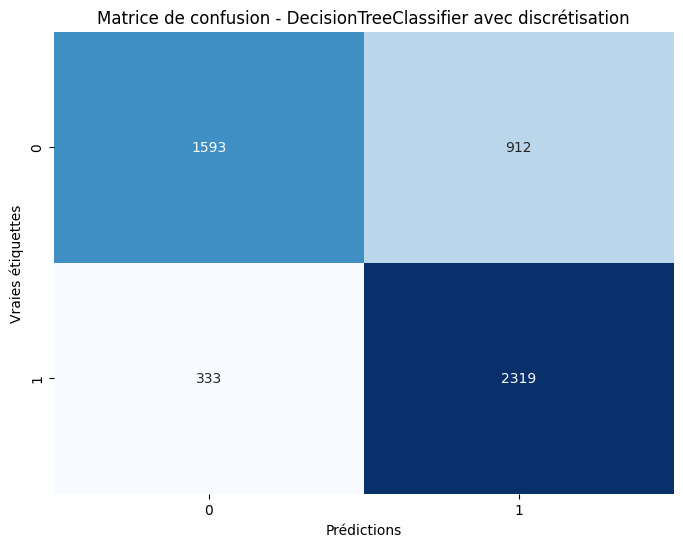

In [16]:
# Matrice de confusion pour DecisionTreeClassifier
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# visualisation du Matrice de confusion pour le modèle DecisionTreeClassifier
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de confusion - DecisionTreeClassifier avec discrétisation')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

## Adaboost (adaptive boosting)

In [17]:
from sklearn.ensemble import AdaBoostClassifier


# Create an instance of AdaBoostClassifier
ada_boost = AdaBoostClassifier()

# Fit the model to the training data
ada_boost.fit(x_train, y_train)

# Predict on the test data
y_pred_ada = ada_boost.predict(x_test)

# Calculate accuracy on the test data
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy on test data for AdaBoost:", accuracy_ada)

Accuracy on test data for AdaBoost: 0.7878611595889082


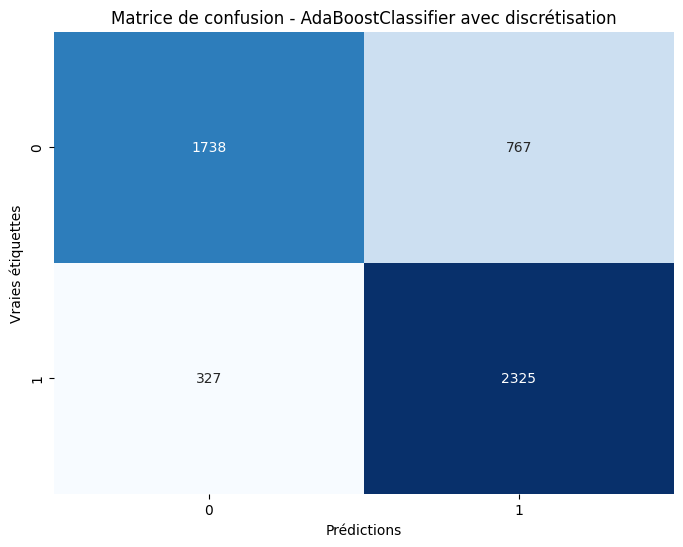

In [18]:
# Display the confusion matrix
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)

# visualisation du Matrice de confusion pour le modèle AdaBoost
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de confusion - AdaBoostClassifier avec discrétisation')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

## KNeighborsClassifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier



# Créer un modèle KNN
knn_model = KNeighborsClassifier()

# Entraîner le modèle sur l'ensemble d'entraînement
knn_model.fit(x_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_knn = knn_model.predict(x_test)

# Évaluer les performances du modèle
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Afficher les résultats
print(f'Accuracy: {accuracy_knn}')


Accuracy: 0.7343416715144464


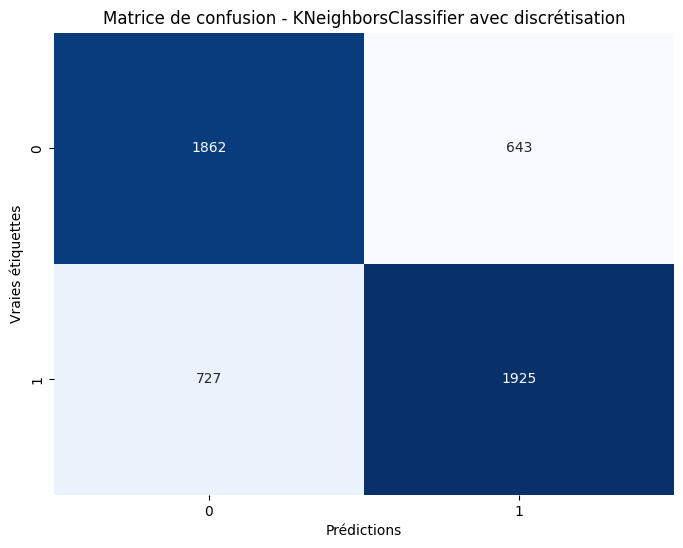

In [20]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# visualisation du Matrice de confusion pour le modèle KNN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de confusion - KNeighborsClassifier avec discrétisation')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Définir le modèle
RF = RandomForestClassifier()
# Ajuster le modèle aux données d'entraînement
RF.fit(x_train, y_train)

# Prédire sur les données de test avec le meilleur modèle trouvé
y_pred_rf = RF.predict(x_test)

# Calculer l'accuracy sur les données de test
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Précision sur les données de test pour RandomForest avec discrétisation :", accuracy_rf)


Précision sur les données de test pour RandomForest avec discrétisation : 0.8394415357766143


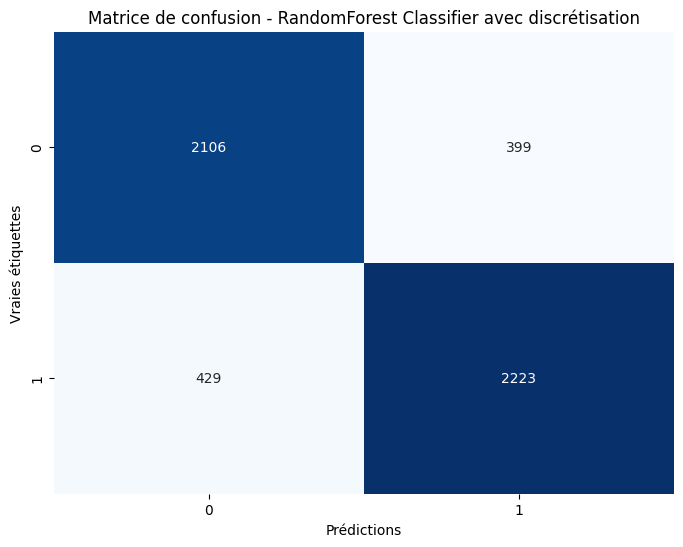

In [22]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# visualisation du Matrice de confusion pour le modèle RandomForest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de confusion - RandomForest Classifier avec discrétisation')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

## Régression logistique

In [23]:
from sklearn.linear_model import LogisticRegression


# Create an instance of LogisticRegression
logreg_model = LogisticRegression()

# Fit the model to the training data
logreg_model.fit(x_train, y_train)

# Predict on the test data
y_pred_logreg = logreg_model.predict(x_test)

# Calculate accuracy on the test data
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Accuracy on test data for Logistic Regression avec discrétisation :", accuracy_logreg)

Accuracy on test data for Logistic Regression avec discrétisation : 0.7578049253441924


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


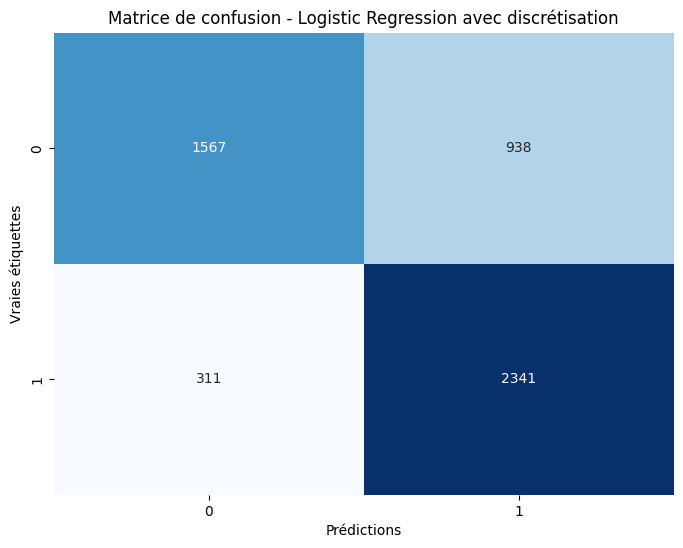

In [24]:
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# visualisation du Matrice de confusion pour le modèle Régression logistique
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de confusion - Logistic Regression avec discrétisation')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

## Neural network

In [25]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


# Normaliser les données (très important pour les réseaux de neurones)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(x_train)
X_test_norm = scaler.transform(x_test)

# Créer un modèle de réseau de neurones simple avec Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train_norm.shape[1]),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train_norm, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Évaluer les performances du modèle sur l'ensemble de test
predictions = (model.predict(X_test_norm) > 0.5).astype('int32')  # Conversion des probabilités en classes binaires
accuracy = accuracy_score(y_test, predictions)

# Afficher les résultats
print(f'Accuracy: {accuracy}')


Epoch 1/10
581/581 [==============================] - 3s 3ms/step - loss: 0.5201 - accuracy: 0.7474 - val_loss: 0.4845 - val_accuracy: 0.7819
Epoch 2/10
581/581 [==============================] - 2s 3ms/step - loss: 0.4879 - accuracy: 0.7661 - val_loss: 0.4828 - val_accuracy: 0.7853
Epoch 3/10
581/581 [==============================] - 1s 2ms/step - loss: 0.4840 - accuracy: 0.7701 - val_loss: 0.4814 - val_accuracy: 0.7746
Epoch 4/10
581/581 [==============================] - 2s 3ms/step - loss: 0.4818 - accuracy: 0.7715 - val_loss: 0.4762 - val_accuracy: 0.7824
Epoch 5/10
581/581 [==============================] - 1s 3ms/step - loss: 0.4808 - accuracy: 0.7718 - val_loss: 0.4764 - val_accuracy: 0.7775
Epoch 6/10
581/581 [==============================] - 1s 3ms/step - loss: 0.4781 - accuracy: 0.7746 - val_loss: 0.4775 - val_accuracy: 0.7848
Epoch 7/10
581/581 [==============================] - 2s 3ms/step - loss: 0.4774 - accuracy: 0.7741 - val_loss: 0.4781 - val_accuracy: 0.7804
Epoch 

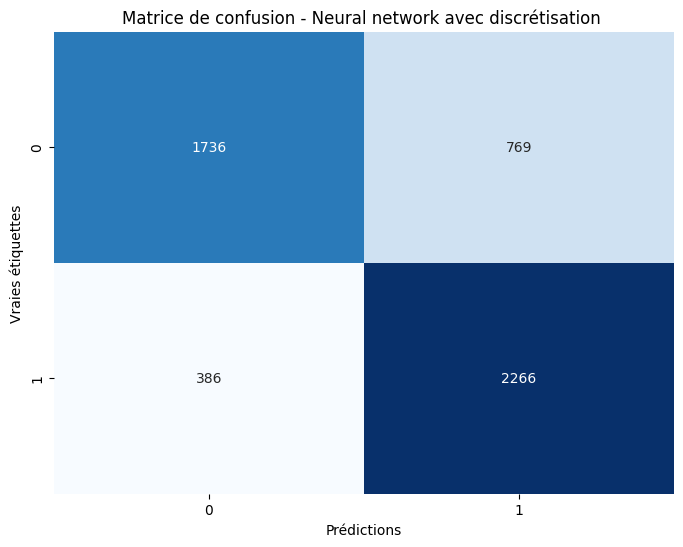

In [26]:
conf_matrix_NN = confusion_matrix(y_test, predictions)

# visualisation du Matrice de confusion pour les Réseaux de neurones
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_NN, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de confusion - Neural network avec discrétisation ')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

# Grid search for random Forest avec discrétisation

In [27]:
# Définir le modèle
RF = RandomForestClassifier()

# Définir la grille des paramètres à tester
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

# Créer l'objet GridSearchCV
grid_search_rf = GridSearchCV(estimator=RF, param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Ajuster le modèle aux données d'entraînement
grid_search_rf.fit(x_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres pour RandomForest:", grid_search_rf.best_params_)

# Prédire sur les données de test avec le meilleur modèle trouvé
y_pred_rf = grid_search_rf.predict(x_test)

# Calculer l'accuracy sur les données de test
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Précision sur les données de test pour RandomForest avec discrétisation :", accuracy_rf)


Meilleurs paramètres pour RandomForest: {'max_depth': 30, 'n_estimators': 50}
Précision sur les données de test pour RandomForest avec discrétisation : 0.8375024238898584


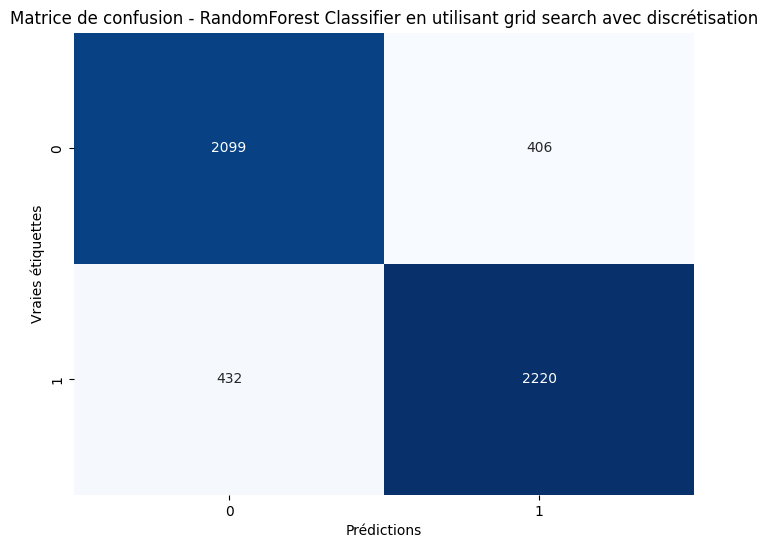

In [28]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
# Matrice de confusion 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de confusion - RandomForest Classifier en utilisant grid search avec discrétisation')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()